# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
tardies =[10,1,5,9,4,2,9,6,0,3]
age = [17,51,27,21,36,48,19,26,54,39]
student_data = pd.DataFrame({'X': tardies, 'Y':age })
# Your code here. 

In [3]:
student_data.head(3)

,X,Y
0,10,17
1,1,51
2,5,27


Draw a dispersion diagram (scatter plot) for the data.

/home/diegodiazgarciadev/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

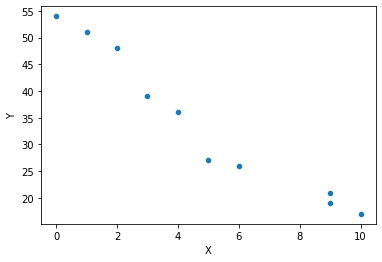

In [4]:
# Your code here.
import seaborn as sns
sns.scatterplot(student_data.X,student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
# more age less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
student_data.corr()
# We have a very high relation between these 2 variables, it is a negative one but it is 
#really strong 	-0.972382

,X,Y
X,1.000000,-0.972382
Y,-0.972382,1.000000


In [7]:
student_data.cov()
# We shoudn't use cov for measure the relation between 2 variables becuase it depends on the
# magnitud and we want a measure indepenient from any magnitud ( normalized).
# we have that with the correlation

,X,Y
X,12.544444,-47.466667
Y,-47.466667,189.955556


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(
    # X = data[["hours", "age", "n_hours_sleep"]],
    X = student_data[["X"]],
    y = student_data.Y,

)

LinearRegression()

In [10]:
optimal_m = lr.coef_[0]
optimal_n = lr.intercept_

In [11]:
# My outcome will be Y ( AGE )
# Linear regression

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

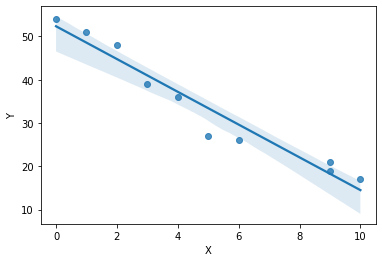

In [12]:
# Your code here.
sns.regplot(x=student_data.X, y=student_data.Y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# Your response here. 
import statsmodels.formula.api as smf
results = smf.ols("X ~ Y", data=student_data).fit()
results.summary()

/home/diegodiazgarciadev/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           2.46e-06
Time:                        21:09:07   Log-Likelihood:                -11.759
No. Observations:                  10   AIC:                             27.52
Df Residuals:                       8   BIC:                             28.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3460      0.768     17.366      0.000      11.574      15.118
Y             -0.2499      0.021    -11.784      0.000      -0.299      -0.201
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.641
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.880
Skew:                          -0.641   Prob(JB):                        0.644
Kurtosis:                       2.315   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# We are pretty confident about the reliability of our model, we have a 0.946 for R2

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need & the data
df = pd.read_csv("./vehicles.csv")

In [16]:
df.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here. 
df_analysis = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]
df_analysis

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [18]:
df_analysis.corr()["CO2 Emission Grams/Mile"]

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 
# I will be using a linear regression with multiple variables

lr.fit(
    # X = data[["hours", "age", "n_hours_sleep"]],
    X = df_analysis[["Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]],
    y = df_analysis["CO2 Emission Grams/Mile"],

)

LinearRegression()

In [40]:
results = smf.ols("Q('CO2 Emission Grams/Mile') ~ Q('Fuel Barrels/Year') +Q('Combined MPG') * Q('Fuel Cost/Year') ", data = df_analysis).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('CO2 Emission Grams/Mile')   R-squared:                       0.992
Model:                                      OLS   Adj. R-squared:                  0.992
Method:                           Least Squares   F-statistic:                 1.145e+06
Date:                          Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                                  21:21:43   Log-Likelihood:            -1.3557e+05
No. Observations:                         35952   AIC:                         2.712e+05
Df Residuals:                             35947   BIC:                         2.712e+05
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               315.0582      1.316    239.431      0.000     312.479     317.637
Q('Fuel Barrels/Year')                   10.8034      0.053    203.631      0.000      10.699      10.907
Q('Combined MPG')                        -1.0948      0.028    -38.595      0.000      -1.150      -1.039
Q('Fuel Cost/Year')                       0.1396      0.001    259.432      0.000       0.139       0.141
Q('Combined MPG'):Q('Fuel Cost/Year')    -0.0077   3.26e-05   -235.465      0.000      -0.008      -0.008
==============================================================================
Omnibus:                    38164.068   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10898776.520
Skew:                           4.850   Prob(JB):                         0.00
Kurtosis:                      87.743   Cond. No.                     8.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

# Your response here. 
* Fuel Barrels/Year
* Combined MPG
* Fuel Cost/Year

Those are the most important variables, with a combination of them suming and multplying (after doing some combination)
I have achieve a 0.992 on R2 just using 3 variables over 5

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [49]:
# Your code here. 
guests = [1,3,4,6,8,9,11,14]
attended = [1,2,4,4,5,7,8,13]

df_party = pd.DataFrame({'X': guests, 'Y':attended })
df_party.head(2)

,X,Y
0,1,1
1,3,2


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

/home/diegodiazgarciadev/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

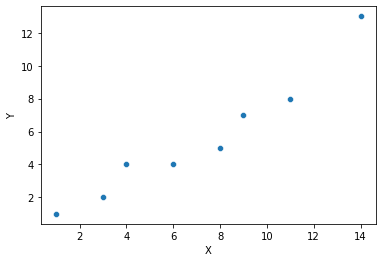

In [50]:
# Your code here.
sns.scatterplot(df_party.X,df_party.Y, data=df_party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

<AxesSubplot:xlabel='X', ylabel='Y'>

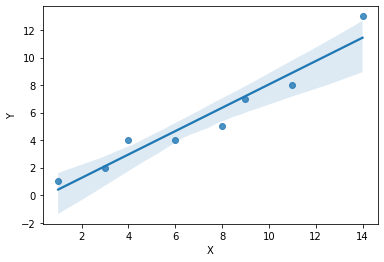

In [52]:
# Your response here. 
# We can check there is a direct relationship between both variables, and it is linear so we 
# we will be able to model this relation with a linear regression model.

sns.regplot(x=df_party.X, y=df_party.Y)

In [55]:
df_party.corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


In [58]:
results = smf.ols("X ~ Y", data=df_party).fit()
results.summary()

/home/diegodiazgarciadev/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           0.000102
Time:                        21:36:49   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Y              1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

/home/diegodiazgarciadev/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X'>

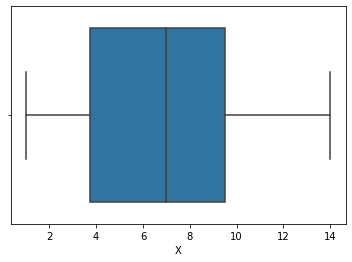

In [61]:
sns.boxplot(df_party.X)

In [63]:
# Your response here. 
df_party

#Acutally there are not autlayers, but we can drop the points that looks farther from 
#our regression (4,4) (8,5) , (14,13)

guests2 = [1,3,6,9,11]
attended2 = [1,2,4,7,8]
df_party2 = pd.DataFrame({'X': guests2, 'Y':attended2 })

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [66]:
# correlation is even bigger now
df_party2.corr()


,X,Y
X,1.000000,0.994132
Y,0.994132,1.000000


In [67]:
#R2 has growth as well
results = smf.ols("X ~ Y", data=df_party).fit()
results.summary()

/home/diegodiazgarciadev/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     253.4
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           0.000539
Time:                        21:44:32   Log-Likelihood:                -2.4998
No. Observations:                   5   AIC:                             9.000
Df Residuals:                       3   BIC:                             8.218
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0860      0.437      0.197      0.857      -1.305       1.477
Y              1.3441      0.084     15.918      0.001       1.075       1.613
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.543
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.522
Skew:                          -0.093   Prob(JB):                        0.770
Kurtosis:                       1.429   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='X', ylabel='Y'>

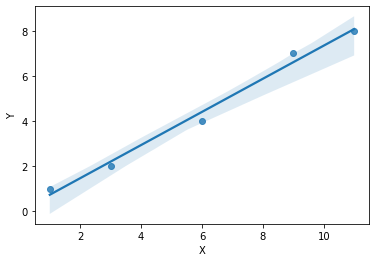

In [68]:
sns.regplot(x=df_party2.X, y=df_party2.Y)

In [ ]:
# And of course there are not visibles outlayers